# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [4]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

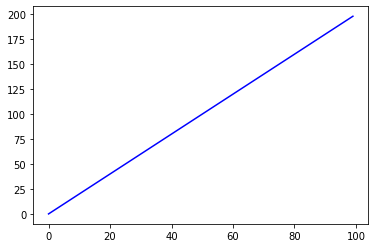

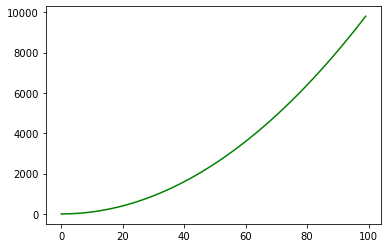

In [5]:
# Method 1
plt.plot(x,y,c="b")
plt.show()

plt.plot(x,z,c="g")
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

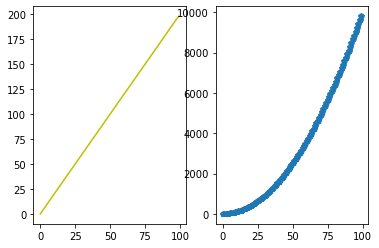

In [6]:
# Method 2
fig, ax = plt.subplots(1, 2) 
ax[0].plot(x,y,"y")
ax[1].plot(x,z,"p")

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

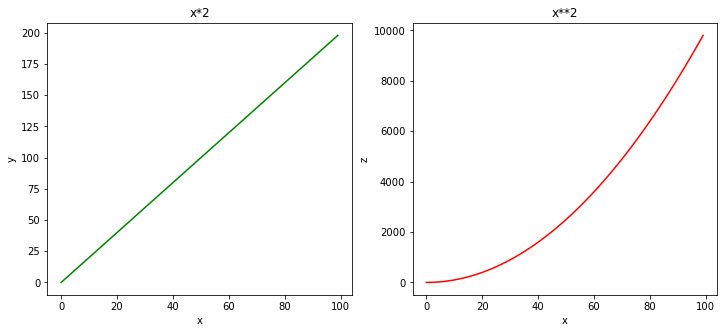

In [47]:
# your code here
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(x,y,'g')
ax[0].set_xlabel("x", fontsize = 10)
ax[0].set_ylabel("y", fontsize = 10)
ax[0].set_title("x*2", fontweight = 20)

ax[1].plot(x,z,'r')
ax[1].set_xlabel("x", fontsize = 10)
ax[1].set_ylabel("z", fontsize = 10)
ax[1].set_title("x**2", fontweight = 20)

plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

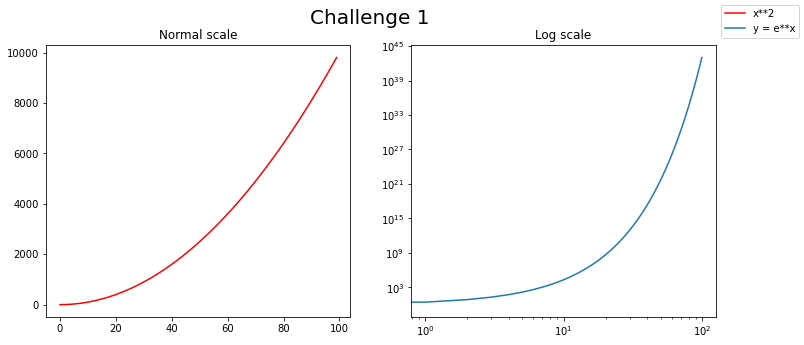

In [75]:
# your code here
import math
fig2, ax2 = plt.subplots(1,2,figsize=(12,5))
fig2.suptitle('Challenge 1', fontsize=20)

ax2[0].plot(x**2, 'r' ,label = 'x**2')
ax2[0].set_title("Normal scale")

ax2[1].plot(math.e**x, label = 'y = e**x')
ax2[1].set_yscale('log')
ax2[1].set_title("Log scale")
ax2[1].set_xscale('log')
ax2[1].set_yscale('log')

fig2.legend()
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [70]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [13]:
# your code here
fitbit = pd.read_csv("../Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Work_or_Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

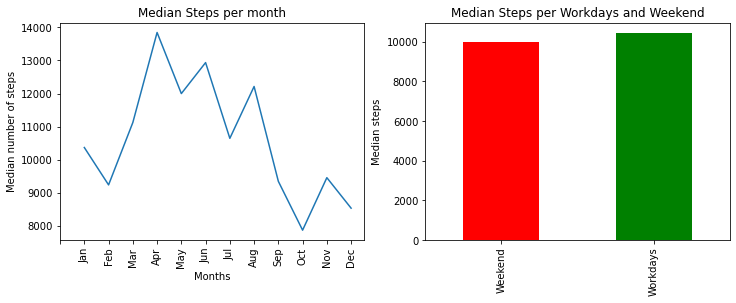

In [147]:
f, ax3 = plt.subplots(1,2, figsize = (12,4))
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_month = fitbit["Steps"].groupby(fitbit["Months_encoded"]).median()
plt.sca(ax3[0])
steps_month.plot( kind = "line")
ax3[0].set_title("Median Steps per month")
ax3[0].set_xlabel("Months", fontsize = 10)
ax3[0].set_ylabel("Median number of steps", fontsize = 10)
plt.xticks(list(range(13)), ["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation = 'vertical')


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_week = fitbit["Steps"].groupby(fitbit["Work_or_Weekend"]).median()

fitbit[fitbit["Work_or_Weekend"] == 0].groupby(fitbit['Days'])['Steps'].count() #comprobamos que el índice 0 son los dias == weekend


plt.sca(ax3[1])
steps_week.plot(kind = "bar", color = ('red','green'))
ax3[1].set_title("Median Steps per Workdays and Weekend")
ax3[1].set_xlabel("", fontsize = 10)
ax3[1].set_ylabel("Median steps", fontsize = 10)
plt.xticks(list(range(2)), ["Weekend","Workdays"])
plt.savefig("median_steps_month_and_workdays_weekend.png")

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

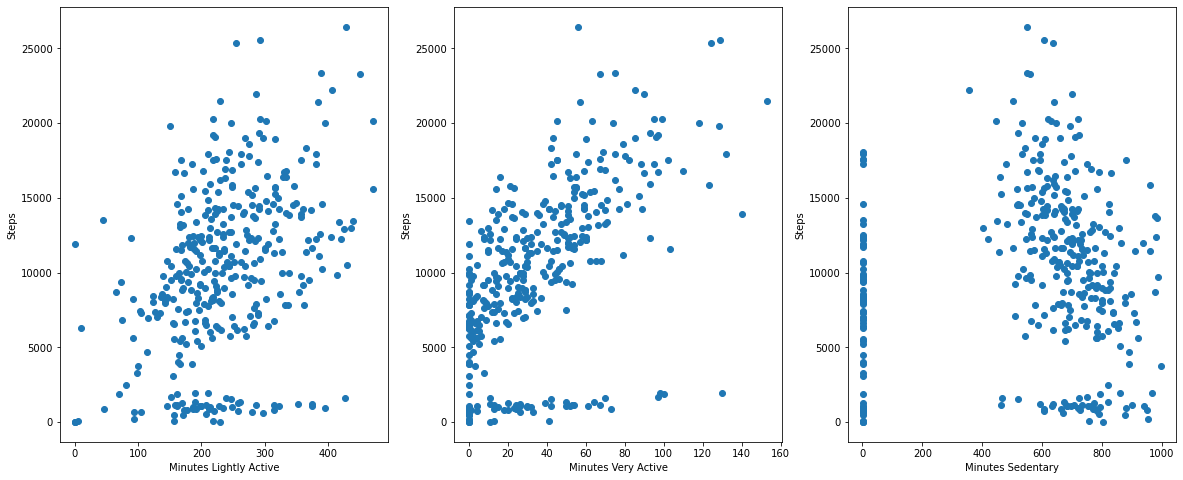

In [173]:
# your code here
cols = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

fitbit_cols = fitbit[cols]


f, ax = plt.subplots(1, 3, figsize = (20,8))

for index in range(len(cols)):
    ax[index].scatter(fitbit_cols[cols[index]], fitbit['Steps'])
    ax[index].set_xlabel(fitbit_cols[cols[index]].name)
    ax[index].set_ylabel("Steps")

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [17]:
# your code here
titanic = pd.read_csv('../titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [20]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [26]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=object).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [27]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=object).dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [183]:
# your code here
sns.set_style("whitegrid")
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

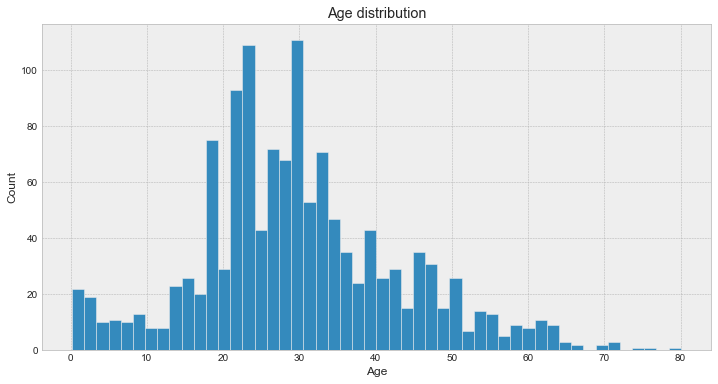

In [189]:
# your code here
plt.hist(titanic["Age"], bins=50)

plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

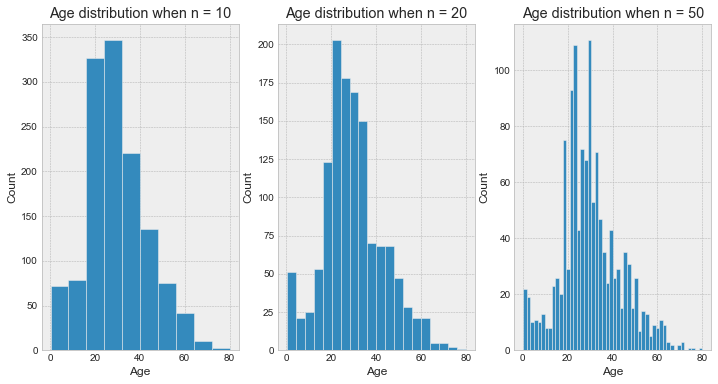

In [185]:
# your code here
bins = [10, 20, 50]
f, ax = plt.subplots(1,3)

# Plot the histogram using a different number of bins
for index in range(len(bins)):
    plt.sca(ax[index])
    titanic["Age"].hist(bins=bins[index])
    plt.title("Age distribution when n = " + str(bins[index]))
    plt.xlabel("Age")
    plt.ylabel("Count")

#### How does the bin size affect your plot?

In [187]:
"""
So much bins turns more difficult to interpret although it's precise.
"""

'\nThe more bins you use the more precise the graph is, yet it turns more difficult to interpret.\n'

#### Use seaborn to show the distribution of column `Age`.

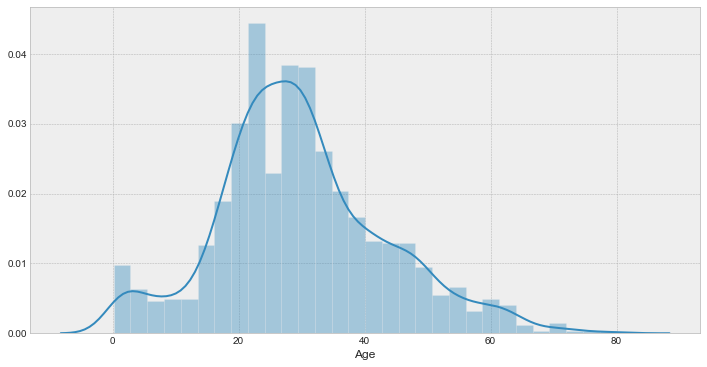

In [188]:
# your code here
sns.distplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

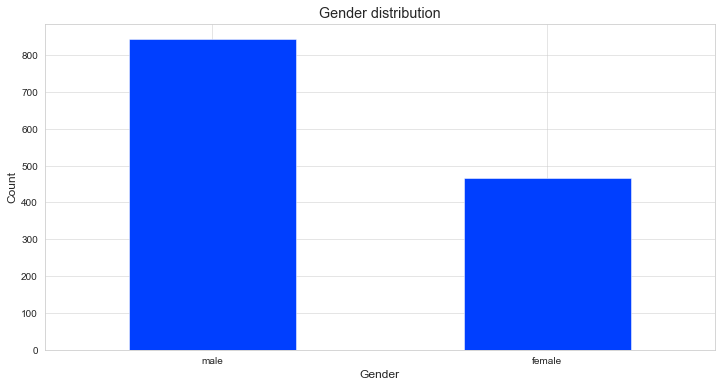

In [195]:
# Method 1 - matplotlib
# your code here

titanic["Gender"].value_counts().plot(kind="bar")
plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation = 0)

<BarContainer object of 2 artists>

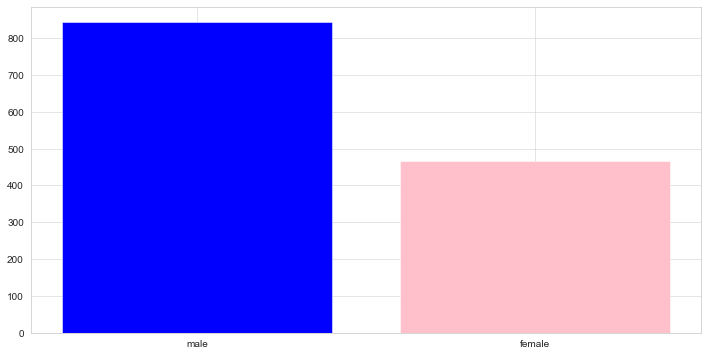

In [242]:
plt.bar(titanic["Gender"].value_counts().index, titanic["Gender"].value_counts(), color =('b','pink'))

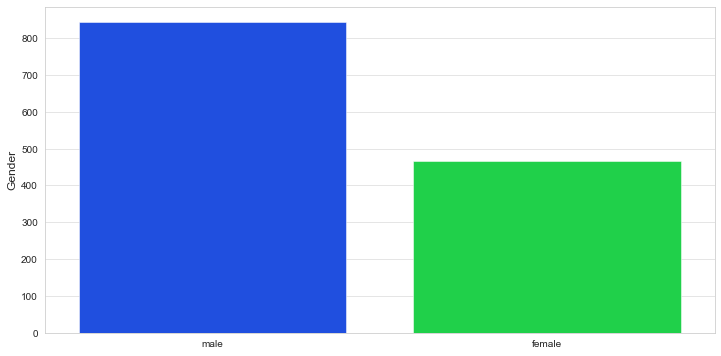

In [236]:
# Method 2 - seaborn
# your code here
sns.barplot(x =titanic["Gender"].value_counts().index, y = titanic["Gender"].value_counts(), data = titanic)

#### Use the right plot to visualize the column `Pclass`.

Text(0, 0.5, '')

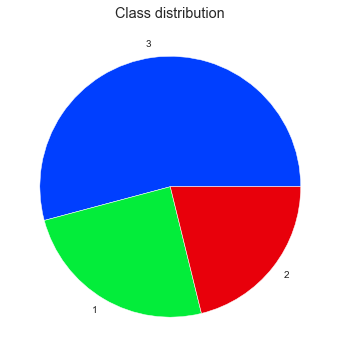

In [211]:
# your code heretitanic["Pclass"].value_counts().plot(kind="pie")

titanic["Pclass"].value_counts().plot(kind="pie")

plt.title("Class distribution")
plt.xlabel("")
plt.ylabel("")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

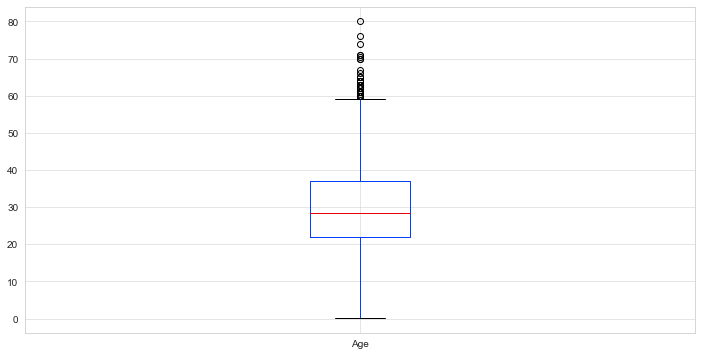

In [212]:
# your code here
titanic.boxplot(column="Age")

In [213]:
"""

The boxplot shows the minimum age, median (red line), the first and third quartiles that form the blue box and the maximum age, the points are the outliers,
"""

'\n\nThe boxplot shows the minimum age, median (red line), the first and third quartiles that form the blue box and the maximum age, the points are the outliers,\n'

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

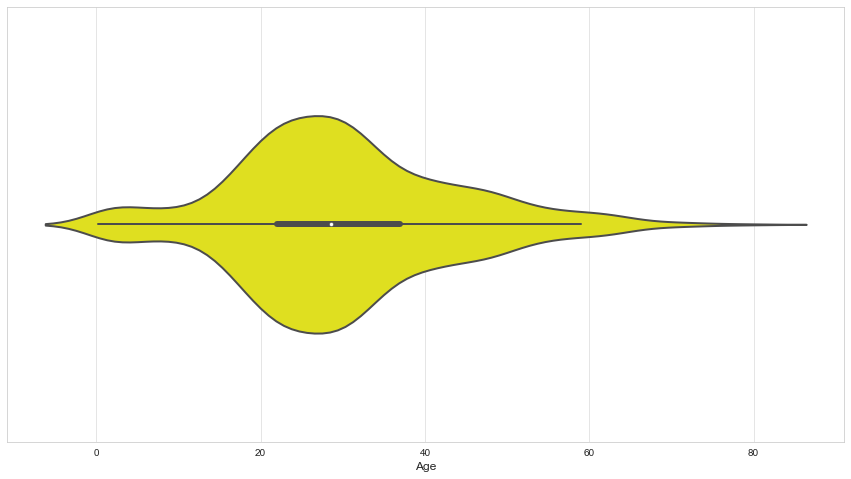

In [255]:
# your code here
plt.figure(figsize = (15,8))
sns.violinplot("Age", data = titanic, width= 0.5, color = 'yellow')

# Show the plot
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
In the violinist the black line gives is from min to max, the thicker slice the IQR (box) and the white pint the median.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

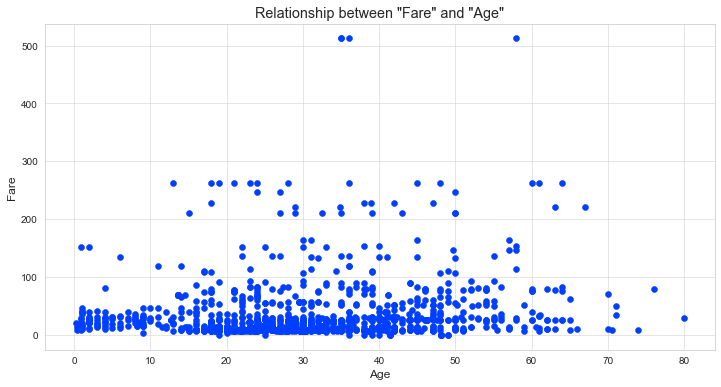

In [294]:
# Method 1 - matplotlib
# your code here

ax.plot(x_pred, y_pred, color='k', label='Regression model')
plt.scatter(titanic["Age"], titanic["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Relationship between "Fare" and "Age"')
plt.show()

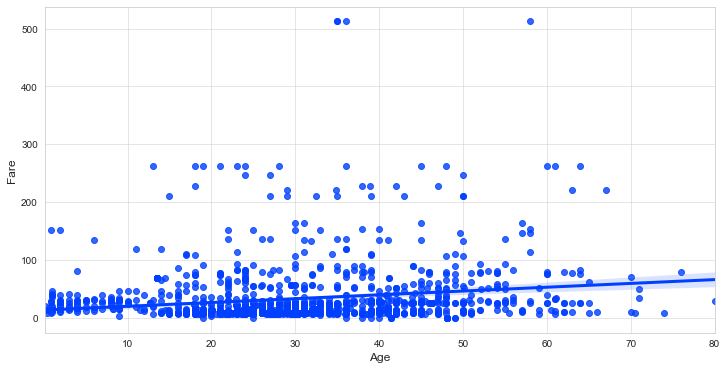

In [292]:
# Method 2 - seaborn
# your code here
sns.regplot(x = "Age",y = "Fare", data = titanic)

#### Plot the correlation matrix using seaborn.

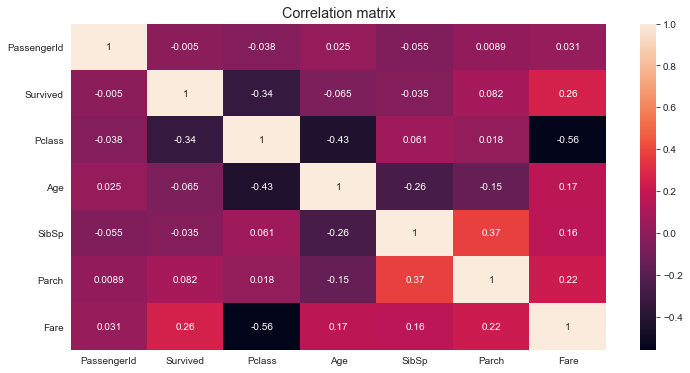

In [250]:
# your code here
sns.heatmap(titanic.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Parch and SibSp gives us the max relation with 0.37
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

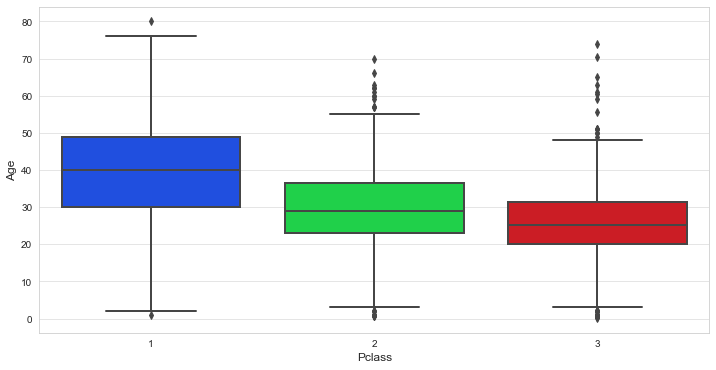

In [252]:
# your code here
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

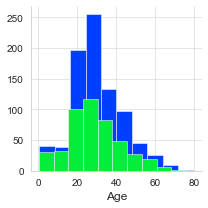

In [283]:
# your code here
g = sns.FacetGrid(data = titanic, hue = "Gender")

g.map(plt.hist, "Age")
plt.show()

In [287]:
plt.hist(titanic[titanic['Gender']=='male']['Age'])
plt.hist(titanic[titanic['Gender']=='female']['Age'])

1       38.000000
2       26.000000
3       35.000000
8       27.000000
9       14.000000
          ...    
1300     3.000000
1301    32.693417
1302    37.000000
1303    28.000000
1305    39.000000
Name: Age, Length: 466, dtype: float64

(array([ 31.,  33., 100., 117.,  83.,  48.,  28.,  19.,   6.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

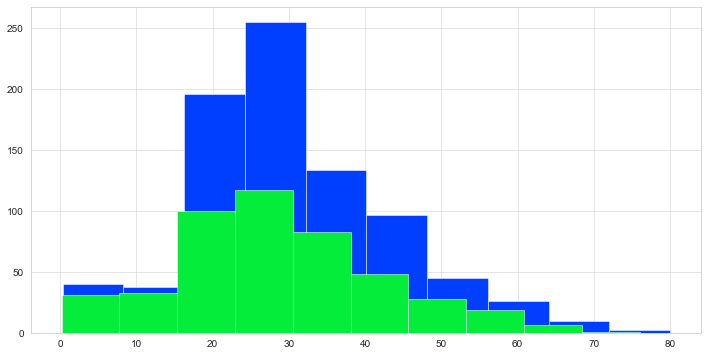